### ✒️Chapter04 : **Neural Network Training**

- 손실 함수
- 경사법

Training(학습)이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것.   
손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표.   
손실 함수의 값을 작게 만드는 기법인 경사법에 대해 배운다.


---

In [1]:
import numpy as np

#### 1. 손실 함수   

> 정답($y_k$)과 신경망 결과값($y_k$) 차이를 구해서 그 오차가 적을수록 정답에 가까워진다는 의미.   
> 정답과의 차이값을 어떻게 구하는 지 손실함수로 표현됨.   

신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현하는데, 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것이다.   
loss fuction이라는 지표를 사용하여 최적의 가중치 매개변수값을 찾는다.(일반적으로 오차제곱합과 교차 엔트로피 오차를 사용함)   

1-1. 오차제곱합 : mean squared error, MSE   
   
$E=\frac{1}{2}\sum_{k} (y_k-t_k)^2$   
   
$y_k$는 신경망이 추정한 값(출력값), $t_k$은 정답 레이블, $k$는 차원의 수를 나타냄.   
신경망이 추정한 값과 정답 값의 차이의 제곱 후 그 총합을 구한다.   
   
   
*Q.오차제곱합 수식에서 0.5를 곱하는 이유?*
> 추후 미분하기 편리하게 하기 위해 곱한 것. 


In [2]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def mean_squared_error(y, t):
    # 오차제곱합
    return 0.5 * np.sum((y-t)**2)

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
# 예1: '2'일 확률이 가장 높다고 추정함 (0.6)
mean_squared_error(np.array(y), np.array(t))
# 오류율이 0.0975

0.09750000000000003

In [3]:
# 예2 '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))
# 오류율이 0.59

0.5975

1-2. 교차 엔트로피 오차 cross entropy error, CEE   
   
$E=-\sum_{k} t_klogy_k$   
   
- log는 밑이 e이 자연로그
- $y_k$는 신경망이 추정한 값(출력값)
- $t_k$은 정답 레이블 : 1,0만 존재(원핫인코딩)   

> 위 수식은, 정답일 때($t_k$=1)의 추정값($y_k$)의 자연로그를 계산하는 식이다.

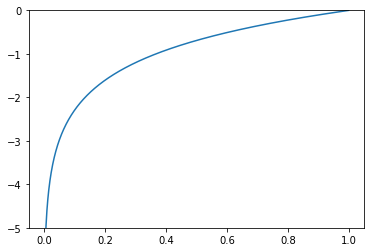

In [4]:
%matplotlib inline
import matplotlib.pylab as plt

"""
정답 레이블은 '2'가 정답. 신경망 출력이 0.6이라면 교차 엔트로피 오차는 -log0.6 = 0.51

같은 조건에서 신경망 출력이 0.1이라면 -log0.1 = 2.3

"""

x = np.arange(0.001, 1.0, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.ylim(-5.0, 0.0) # y축의 범위 지정
plt.show()

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [6]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

첫 번째 예: 정답일 때의 출력 0.6인 경우 교차 엔트로피 오차는 약 0.51

두 번째 예: 출력이 0.1이라면 교차 엔트로피 오차는 약 2.3

첫 번째 추정이 정답일 가능성이 높다고 판단

1-3. 미니 배치 학습   
   
$E=-\frac{1}{N}\sum_{n} \sum_{k} t_nklogy_nk$   
   
- N개의 데이터, $t_nk$는 n번째 데이터의 k차원째 값
- log는 밑이 e이 자연로그
- $y_nk$는 신경망이 추정한 값(출력값)
- $t_nk$은 정답 레이블
- **N으로 나눔으로서 평균 손실 함수를 구함**

미니배치 : 훈련 데이터로부터 일부만 골라 학습을 수행   
미니배치 학습 : 60000장의 훈련 데이터 중 100장을 무작위로 뽑아 그 100장을 사용하여 학습

In [7]:
# import sys, os
# sys.path.append(os.pardir)
# import numpy as np
# from dataset.mnist import load_mnist

# (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
## one_hot_label=True함으로써 정답 위치의 원소만 1이고 나머지는 0

# print(x_train.shape) # (60000, 784)
# print(t_train.shape) # (60000, 10)


# train_size = x_train.shape[0]
# batch_size = 10
# batch_mask = np.random.choice(train_size, batch_size)     np.random.choice(60000,10) 랜덤으로 60000미만의 수 중에서 무작위로 10개 추출(인덱스값 10개를 추출)
# x_batch = x_train[batch_mask]                             # 해당 인덱스값(무작위 선택된)을 train셋에서 추출
# t_batch = t_train[batch_mask]

# np.random.choice(60000, 10)
# > array([ 6400, 19286,  1782,  3374, 49695, 27075, 13458, 28598, 31095, 59321])

In [8]:
"""
reshape 함수 예제
"""
import numpy as np
a = [1,2,3,4,5,6,7,8]
b = np.reshape(a,(2,4))
c = np.reshape(a,(4,2))
f =  np.reshape(a,(1,8))
print(b)
print('\n')
print(c)
print('\n')
print(f)

[[1 2 3 4]
 [5 6 7 8]]


[[1 2]
 [3 4]
 [5 6]
 [7 8]]


[[1 2 3 4 5 6 7 8]]


In [9]:
def cross_entropy_error(y, t):
    """
    배치 데이터를 처리 할 수 있는 교차 엔트로피 오차 구하기.
    * 정답이 원핫인코딩이 아닌 숫자
    """

    if y.ndim == 1:                     # 신경망값이 1차원이라면 추가 처리 필요
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]             # 신경망값 배열의 행 사이즈(데이터 갯수)
    # return -np.sum(t * np.log(y)) / batch_size
        
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
    # t가 0일때는 t * np.log(y)이 0이므로 패스
    # t가 1일때(정답일 때), 정답에 해당하는 신경망의 출력만으로 교차엔트로피 오차를 계산함.
    # np.log(y[np.arange(batch_size), t])
    # # batch_size = 5, np.arange(batch_size) = [0, 1, 2, 3, 4] --> 인덱스 위치
    # # t = [2, 7, 0, 9, 4]                                     --> 위 인덱스 위치의 정답
    # y[np.arange(batch_size),t]는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출
    # 즉,  y[np.arange(batch_size),t] = [y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]] 
    # y[0]의 정답은 2, y[1]의 정답은 7,,,

1-5. 왜 손실 함수를 설정하는 지.   

신경망에서의 '미분'의 역할...   
신경망 학습에서 최적의 매개변수를 찾기 위해 손실함수의 값을 가능한 작게 하는 최적의 값을 찾는다.(정답과의 차이를 줄이는 것) 이때 매개변수의 미분(기울기)를 계산하고 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.   

가중치 매개변수의 손실 함수의 미분이란, **가중치 매개변수의 값을 아주 조금 변화시켰을  때 손실 함수가 어떻게 변하는가**라는 의미이다.   
ex, 미분값이 음수면 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄이 수 있다.

---

### 2. 수치 미분   
   
경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정한다.   
- 기울기란?
- 기울기의 성질
> 미분 복습

2-1. 미분   

미분이란, 
- 한 점에서의 기울기
- 특정 순간의 변화량   

$\frac{df(x)}{d(x)}= \lim_{x \to 0} \frac{f(x+h)-f(x)}{h}$   

좌변은 $f(x)$의 x에 대한 미분(x에 대한 f(x)의 변화량)을 나타내는 기호 : $\frac{df(x)}{d(x)}$   
x의 작은 변화가 f(x)를 얼마나 변화시키는지 의미함.

- 차분 vs 미분   
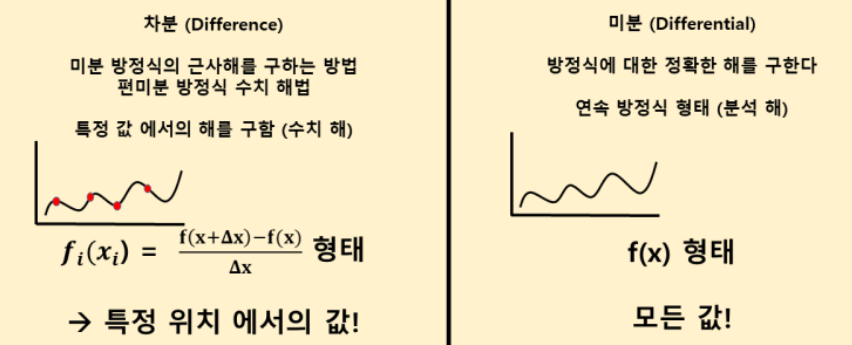

- 수치 미분: 아주 작은 차분으로 미분을 구하는 것
- 해석적(analytic) 해: 수식을 전개해 미분을 구하는 것
- 해석적 미분은 오차를 포함하지 않는 '진정한 미분' 값을 구함

$$y=0.01x^2+0.1x$$

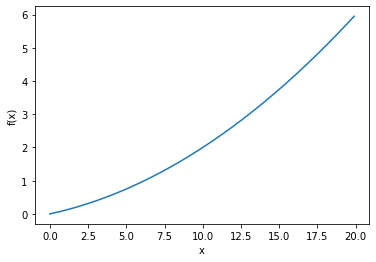

In [10]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x

# 그림 4-6 식 f(x)=0.01x**2 + 0.1x 그래프
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다.
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [11]:
# x = 5
numerical_diff(function_1, 5)

0.1999999999990898

위에서 계산한 미분 값이 x에 대한 f(x)의 변화량의 해석적 해법은   
$$\frac{df(x)}{d(x)}=0.02x+0.1$$   

x가 5일 때, 진정한 미분은 0.2가 됨.

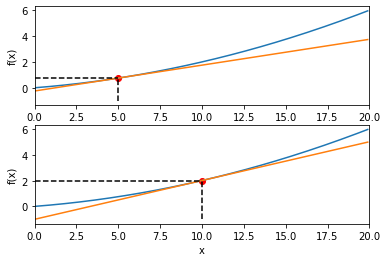

In [12]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

def draw(ax, x, y, line, tox, toy):
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.plot(x, y)
    ax.plot(x, line)
    h = np.arange(0, tox, 0.01)
    v = np.arange(-1, toy, 0.01)
    ax.plot(np.array([tox for _ in range(v.size)]), v, 'k--')
    ax.plot(h, np.array([toy for _ in range(h.size)]), 'k--')
    ax.scatter(tox,toy,color='red')
    ax.set_xlim([0,20])
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

tf = tangent_line(function_1, 5)
y2 = tf(x)
tf = tangent_line(function_1, 10)
y3 = tf(x)

f, (ax1, ax2) = plt.subplots(2, 1)
draw(ax1, x, y, y2, 5, function_1(5))
draw(ax2, x, y, y3, 10, function_1(10))

2-2. 편미분   
편미분은 변수가 하나 이상인 다변수 함수를 대상으로 한다.   
어느 변수에 대한 미분인지 구별해야함.   
$$f_x(x,y) = \frac{\sigma f}{\sigma x}$$   
$$f(x_0,x_1)=x_0^2+x_1^2$$

In [13]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

C:\Users\DANIK\AppData\Local\Temp\ipykernel_22824\2517274023.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


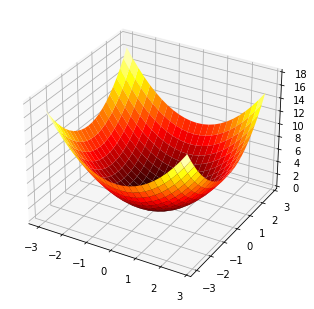

In [14]:
from mpl_toolkits.mplot3d import Axes3D
X = np.arange(-3, 3, 0.25)
Y = np.arange(-3, 3, 0.25)
XX, YY = np.meshgrid(X, Y)
ZZ = XX**2 + YY**2

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, YY, ZZ, rstride=1, cstride=1, cmap='hot');

example : $x_0$ = 3, $x_1$=4일때, $x_0$에 대한 편미분 구하기   
$x_0^2+4.0^2$

In [15]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [16]:
4.0**2.0 + 3*3

25.0

example : $x_0$ = 3, $x_1$=4일때, $x_1$에 대한 편미분 구하기   
$3^2+x_1^2$

In [17]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

### 3. 기울기

기울기(gradient): 모든 변수의 편미분을 벡터로 정리한 것.   

$$(\frac{\delta f}{\delta x_0},\frac{\delta f}{\delta x_1})$$

In [18]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성 :: X만큼의 0 배열 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

example. 세 점 (3,4), (0.2), (3,0)에서 기울기 구하기

In [19]:
_numerical_gradient_no_batch(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [20]:
_numerical_gradient_no_batch(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [21]:
_numerical_gradient_no_batch(function_2, np.array([3.0, 0.0]))

array([6., 0.])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


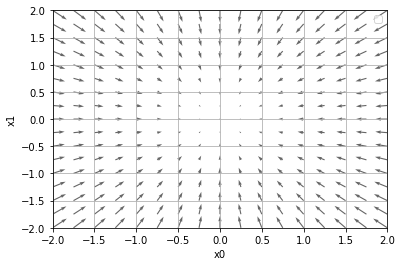

In [22]:
from mpl_toolkits.mplot3d import Axes3D

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
    
X = X.flatten()
Y = Y.flatten()
    
grad = numerical_gradient(function_2, np.array([X, Y]) )
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

> 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 줄이는 방향

#### 경사법(경사 하강법)   

최적의 매개변수(가중치와 편향)을 학습 시에 찾아내는데, 최적은 손실함수가 최소값이 될 때 매개변수 값이다.   

- 경사법: 기울기를 잘 이용해 함수의 최소값을 찾으려는 방법
- 함수가 극소값, 최소값, 안장점(saddle point)이 되는 장소에서는 기울기가 0   
   
경사법은 기울기가 0인 장소를 찾지만, 최솟값이 아닌 극솟값이나 안장점일수 있다.
- 극소값: 한정된 범위에서의 최소값인 점
- 안장점: 어느 방향에서 보면 극대값 다른 방향에서 보면 극소값이 되는 점
- 복잡하고 찌그러진 모양의 함수라면 (대부분) 평평한 곳으로 파고들면서 고원(plateau, 플래토)이라 하는, 학습이 진행되지 않는 정체기에 빠질 수 있음.   
   
   
**경사법(gradient method)** :

현 위치에서 기울어진 방향으로 일정 거리만큼 이동. 다음 위치에서도 또 기울어진 방향으로 나아가는 일을 반복.   

- 경사 하강법(gradient descent method): 최소값을 찾음. 신경망(딥러닝) 분야에서 주로 사용.
- 경사 상승법(gradient ascent method): 최대값을 찾음

$$x_0 = x_0-\eta \frac{\delta f}{\delta x_0}$$

- $\eta$(에타)는 갱신하는 양을 나타냄 :: 학습률(learning rate)
    - 한 번 학습으로 얼마만큼 학습해야 할지, 매개변수 값($x_0,x_1,,$)을 얼마나 갱신해야하는 지 정하는 것이 학습률
- 위 수식을 반복하여 변수의 값을 갱신하는 단계를 여러번 반복하고 서서히 함수의 값을 줄여가는 것.
- 학습률은 미리 특정 값으로 정해둬야 함.
    - 0.01, 0.001
    - 이 값이 너무 크거나 작으면 '좋은 장소'를 찾아가기 어렵다.
    - 신경망 학습에서 학습률 값을 변경하면서 올바르게 학습하는 지 확인하며 진행함.

In [23]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    '''
    f : 최적화하려는 함수
    init_x : 초기 매개변수 값
    lr : 학습률(에타)
    step_num : 경사법 반복 획수
    
    numerical_gradient(f, x)로 함수의 기울기를 구하고, 학습률을 곱한 값으로 x값(매개변수)을 갱신한다.
    위 프로세스를 step_num만큼 반복
    '''
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

problem : $f(x_0,x_1)=x_0^2+x_1^2$   
경사법으로 위의 최솟값을 구하기   
$x_0 = -3, x_1=4$

In [24]:
def function_test(x):
    return x[0]**2+x[1]**2

input_x = np.array([-3.0,4.0])
gradient_descent(function_test,input_x,lr=0.1)

array([-6.11110793e-10,  8.14814391e-10])

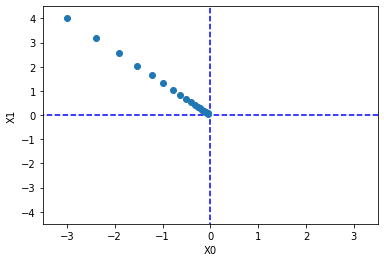

In [25]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

#### 신경망에서의 기울기   

- 신경망 기울기 : 가중치 매개변수에 대한 손실 함수의 기울기

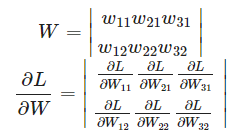

In [26]:
import numpy as np

def softmax(x):
    
    # 2차원이면 전치
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
        # 가중치 w는 2X3형태의 배열 : 초기화

    def predict(self, x):
        '''
        예측
        '''
        return np.dot(x, self.W)

    def loss(self, x, t):
        '''
        x를 입력하여 예측값 z를 도출하고
        z를 softmax에 넣어서 y값을 도출
        정답 t와 값 비교하여 loss값 추출
        '''
        
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [27]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[ 1.40300425  1.75654462  0.87126056]
 [-1.77601839  2.27030979  0.92620219]]


In [28]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.756614    3.09720558  1.35633831]


In [29]:
np.argmax(p) # 최대값의 인덱스

1

In [32]:
t = np.array([0, 1, 0]) # 정답 레이블
net.loss(x,t)

0.17945650244795028

In [33]:
def f(W):
    return net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)
# >>
# [[ 0.01062972 -0.09856542  0.0879357 ]
#  [ 0.01594458 -0.14784813  0.13190355]]

[[ 0.01062972 -0.09856542  0.0879357 ]
 [ 0.01594458 -0.14784813  0.13190355]]


In [35]:
# w11은 대략 0.0106, w11을 h만큼 늘리면 손실함수는 0.0106h만큼 감소. 손실함수를 줄이려면 음의 방향으로 갱신해야함.

In [36]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.01062972 -0.09856542  0.0879357 ]
 [ 0.01594458 -0.14784813  0.13190355]]


---

### 4. 2층 신경망 클래스 구현하기

In [ ]:
import numpy as np

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads